In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [26]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [27]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [28]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [29]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [31]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

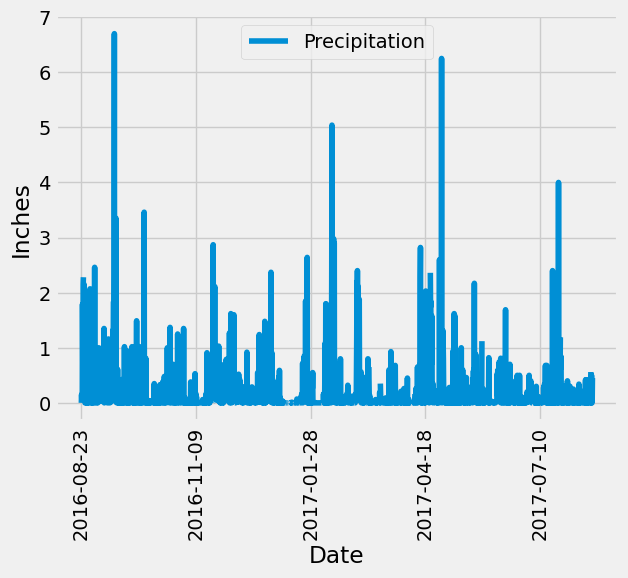

In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
previous_year

# Perform a query to retrieve the data and precipitation scores
query_date = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).\
order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(query_date, columns=["Date", "Precipitation"])

# Sort the dataframe by date
rain_df.sort_values(by="Date")

# Use Pandas Plotting with Matplotlib to plot the data

rain_df.plot("Date","Precipitation", figsize = (6.5,6), xlabel="Date", ylabel="Inches", rot=90)
plt.tight_layout()
plt.show()

In [50]:
# Use Pandas to calculate the summary statistics for the precipitation data
summ_stat = rain_df.describe()
summ_stat

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [51]:
# Design a query to calculate the total number of stations in the dataset
total_station = session.query(Station).count()
total_station

9

In [52]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
most_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]

temp_station = session.query(*sel).filter(Measurement.station == "USC00519281").all()
temp_station

[(54.0, 85.0, 71.66378066378067)]

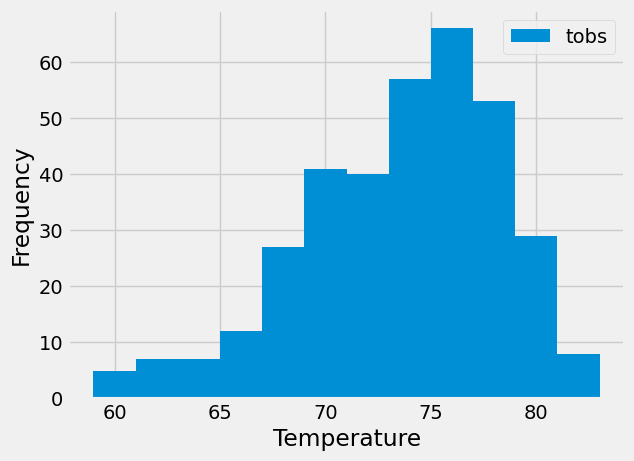

In [54]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
station_query = session.query(Measurement.tobs).filter(Measurement.date >= previous_year).\
filter(Measurement.station=="USC00519281").order_by(Measurement.tobs).all()

#plot the results as a histogram
station_df = pd.DataFrame(station_query, columns=["tobs"])
station_df.plot.hist(xlabel="Temperature", bins=12)
plt.show()

# Close Session

In [17]:
# Close Session
session.close()